# Green Taxis in NYC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data: Feb 2016

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [3]:
df = pd.read_csv( 'green_tripdata_2016-02.csv' )

In [128]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,...,13.0,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,...,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [129]:
shape = df.shape
print('Number of rows = ' , shape[0])
print('Number of columns =' , shape[1])

Number of rows =  1510722
Number of columns = 21


# Visualize trip distance by time of day

In the following, I find the trip distance by hour of day. I analyze the distribution of trip distance by hour of the day and provide my observations. 


In [4]:
## Define Datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [262]:
## Find mean and standard deviation by hour of the day
def q_l(x):
    return x.quantile(0.25)
def q_h(x):
    return x.quantile(0.75)

df_distance = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg({'Trip_distance': 
                                ['count','mean', 'median',q_l,q_h]})

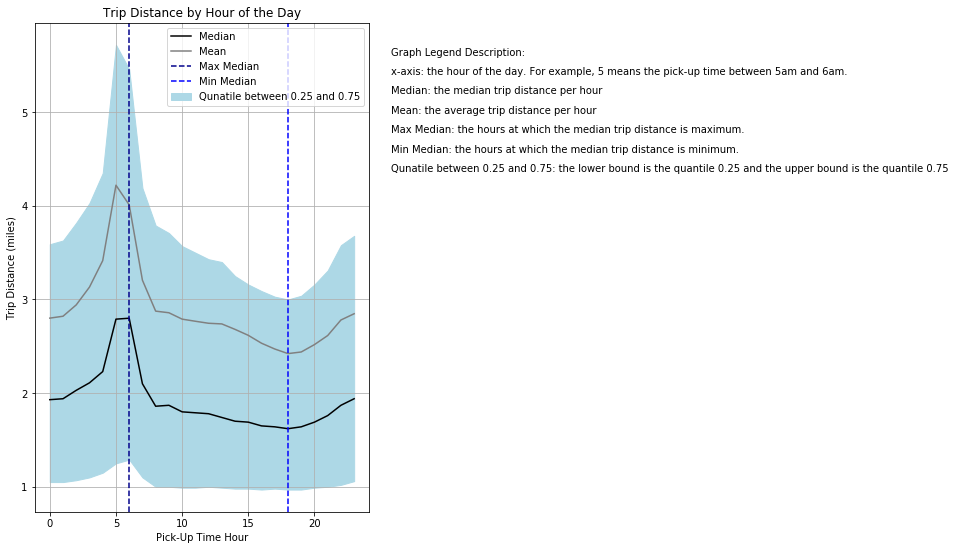

In [283]:
## Graph for trip distance by hour of the day

plt.figure(figsize = (6,9))
plt.plot(df_distance.index , df_distance[('Trip_distance','median')],color = 'black', label= 'Median')
plt.plot(df_distance.index , df_distance[('Trip_distance','mean')],color = 'grey', label= 'Mean')
plt.fill_between(df_distance.index, df_distance[('Trip_distance','q_l')] , 
                                    df_distance[('Trip_distance','q_h')] , 
                                         color='lightblue' , label = 'Qunatile between 0.25 and 0.75')

plt.axvline( df_distance[('Trip_distance','median')].idxmax() , color = 'darkblue', 
            linestyle = '--', label = 'Max Median' )
plt.axvline( df_distance[('Trip_distance','median')].idxmin() , color = 'blue', 
            linestyle = '--' , label = 'Min Median')
plt.xlabel('Pick-Up Time Hour')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Distance by Hour of the Day')
plt.legend()
plt.figtext(.95, .83, 'Graph Legend Description:')
plt.figtext(.95, .80, 'x-axis: the hour of the day. For example, 5 means the pick-up time between 5am and 6am.')
plt.figtext(.95, .77, 'Median: the median trip distance per hour')
plt.figtext(.95, .74, 'Mean: the average trip distance per hour')
plt.figtext(.95, .71, 'Max Median: the hours at which the median trip distance is maximum.')
plt.figtext(.95, .68, 'Min Median: the hours at which the median trip distance is minimum.')
plt.figtext(.95, .65, 'Qunatile between 0.25 and 0.75: the lower bound is the quantile 0.25 and the upper bound is the quantile 0.75')
plt.grid()
plt.show()

Observations:

- **Trip distance distribution is right-skewed:** Median is lower than the average trip distance. The distribution is skewed to right. So median is a better measure to describe trip distance. 

- **High average of trip distance early in the morning:** The median trip distance reaches its maximum at 6 (between 6am and 7am). The median trip distance is quite high between 4am to 8am compared to other times of the day. More information is needed to understand why this is the case. One reason could be riders in the early morning are those who take long-distance rides. For example, these are riders who live far away from their workplace, so they have to leave early to get to work in time. Another reason could be that 4am-8am lies in the rush hour in New York City (NYC). During the rush hours, drivers may choose to get the longer routes to avoid heavy traffic. So the shortest routes between rides in the morning and other times of the day are not different, but due to heavy traffic in the morning, we observe an increase in average distance in the morning. 

- **The median trip distance is NOT bimodal:** The median trip distance decreases after 6 until it gets to its minimum at 18 (between 6pm and 7pm). If riders take Green Taxis to commute from and to somewhere, we may expect to see another peak later in the afternoon/evening. One reason that we do not see another peak might be that riders may use different means of transportation to commute for the return trip. For example, long-distance riders get the taxi in the morning and train in the afternoon. Another reason that we do not observe another peak might be that riders take a taxi for the return trip, but the rush hour in the evening is more spread out compared to the one in the morning. 

In the below graph, I show the median trip duration by the hour of the day. As I hypothesized above, the part of the increase in trip distance in the morning can be attributed to the higher trip duration in the morning compared to afternoon/evening.



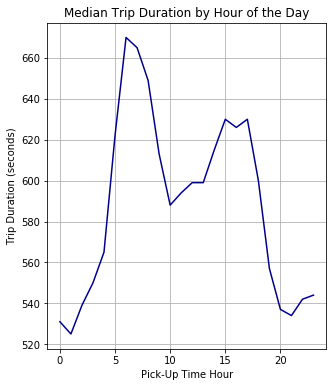

In [286]:
## Find trip duration
df['Lpep_dropoff_datetime']  = pd.to_datetime(df['Lpep_dropoff_datetime'])
df['trip_duration'] = (df['Lpep_dropoff_datetime']  - df['lpep_pickup_datetime'])/np.timedelta64(1, 's')

## Graph for trip duration by hour of the day
plt.figure(figsize = (5,6))
df.groupby(df['lpep_pickup_datetime'].dt.hour)['trip_duration'].median().plot(color = 'darkblue')
plt.xlabel('Pick-Up Time Hour')
plt.ylabel('Trip Duration (seconds)')
plt.title('Median Trip Duration by Hour of the Day')
plt.grid()
plt.show()

# What are the most popular pickup locations on weekends vs weekdays?


In this section, I build a simple unsupervised machine learning algorithm to analyze the data. Specifically, I find pickup clusters on weekdays and weekends by applying the K-Means algorithm. Finally, I visualize the pickup clusters in a geospatial graph of New York City (NYC).  





In [296]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
import geopandas  as gpd
import contextily as ctx

In [297]:
## Define weekend: 0 (weekday), 1(weekend)
df['weekend'] = 1*(df['lpep_pickup_datetime'].dt.weekday >= 5)
df_pickup = df[['Pickup_longitude','Pickup_latitude','weekend']].copy()

**K-Means Clustering**

Because there are more than 1.5 million observations, I use Mini-Batch K-Means clustering to speed up the algorithm. I apply the algorithm to weekdays and weekends separately. To choose the number of clusters, I plot the K-Means loss as a function of different clusters.  

In [465]:
n_clusters = 20

df_loss = pd.DataFrame([]) 

for i_week in range(2):

    condition = ( df_pickup['weekend'] == i_week )   
    X = df_pickup[condition][['Pickup_longitude','Pickup_latitude']].copy()

    
    ## drop outliers
    min_X = X['Pickup_longitude'].quantile(0.01)
    max_X = X['Pickup_longitude'].quantile(0.99)
    condition_outlier = (X['Pickup_longitude'] >= min_X) & (X['Pickup_longitude'] <= max_X)
    
    X = X[condition_outlier].copy()
  #  X = MinMaxScaler().fit_transform(X)
#   X = StandardScaler().fit_transform(X)
    
    for i_n_clusters in range(1,n_clusters):

        model_kmeans = MiniBatchKMeans(n_clusters = i_n_clusters).fit(X)
        
        df_loss_tmp = pd.DataFrame( [model_kmeans.inertia_] , columns= ['loss'])
        df_loss_tmp['weekend'] = i_week
        df_loss_tmp['n_clusters'] = i_n_clusters
        df_loss = df_loss.append(df_loss_tmp)

df_loss.sort_values(['weekend','n_clusters'], inplace = True)

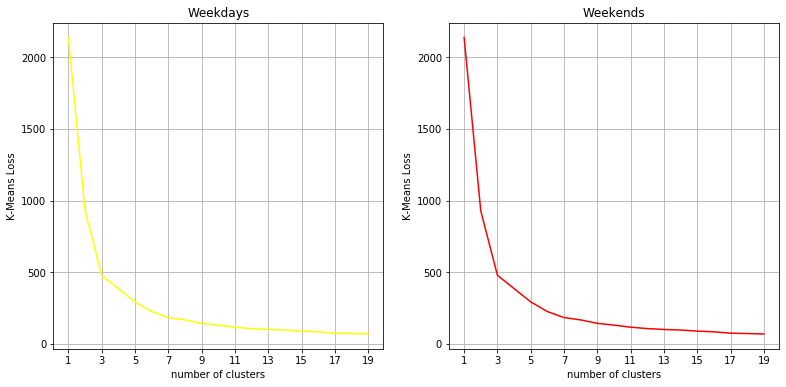

In [540]:
plt.figure(figsize = (13,6))


condition = (df_loss['weekend'] == i_week)

plt.subplot(121)
plt.plot(df_loss[condition]['n_clusters'],df_loss[condition]['loss'],color = 'yellow')
plt.title('Weekdays')
plt.xlabel('number of clusters')
plt.ylabel('K-Means Loss')
plt.xticks(np.arange(1,n_clusters,2))
plt.grid()

plt.subplot(122)
plt.plot(df_loss[condition]['n_clusters'],df_loss[condition]['loss'],color = 'red')
plt.title('Weekends')
plt.xlabel('number of clusters')
plt.ylabel('K-Means Loss')
plt.xticks(np.arange(1,n_clusters,2))
plt.grid()

plt.show()

It seems after 8 clusters the decrease in loss function is marginal. I choose 8 clusters both for weekdays and weekends. In the following, I train the K-Means algorithm. I find the number of pickups that belong to each cluster.

In [355]:
n_clusters = 8

df_kmeans = pd.DataFrame([]) 
df_clusters = pd.DataFrame([]) 

for i_week in range(2):
    condition = (df_pickup['weekend'] == i_week)
    
    X = df_pickup[condition][['Pickup_longitude','Pickup_latitude']].copy()
    model_kmeans = MiniBatchKMeans(n_clusters = n_clusters).fit(X)
                
    df_tmp = X.copy()
    df_tmp['centroid_label'] = model_kmeans.labels_ 
    df_tmp['weekend'] = i_week
    
    df_kmeans = df_kmeans.append(df_tmp)
    
    df_rank = df_tmp['centroid_label'].value_counts(normalize = True).to_frame('n_trips_centroid').reset_index()
    df_rank.rename(columns = {'index': 'centroid_label'} , inplace = True)
    df_rank['centroid_rank'] = df_rank['n_trips_centroid'].rank(ascending = False)
    df_rank['centroid_rank'] = df_rank['centroid_rank'] - 1
    df_rank['centroid_rank'] = df_rank['centroid_rank'].astype(int) 
    
    df_clusters_tmp = pd.DataFrame(model_kmeans.cluster_centers_ ,columns= ['Pickup_longitude','Pickup_latitude'])
    df_clusters_tmp = pd.merge(df_clusters_tmp, df_rank, left_on = df_clusters_tmp.index , right_on = 'centroid_label' , how = 'left')
    df_clusters_tmp['weekend'] = i_week
    
    df_clusters = df_clusters.append(df_clusters_tmp)
    

The below graph shows the density of clusters for weekends and weekdays. The most popular pickup clusters include almost 26% of all rides at weekends and almost 24 percent of all rides at weekends. Note that the locations of clusters for weekdays vs. weekends are different. 

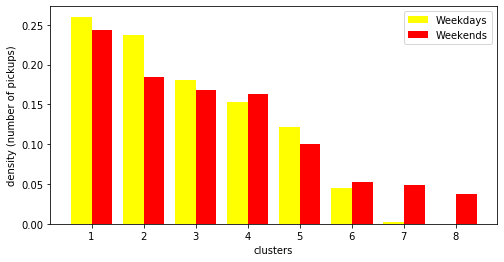

In [492]:
plt.figure(figsize = (8,4))

condition = (df_clusters['weekend'] == 0)

width = 0.4
plt.bar(df_clusters[condition]['centroid_rank']  + 1 - width/2 , df_clusters[condition]['n_trips_centroid']  ,
        label = 'Weekdays', color = 'yellow', width = width)
plt.bar(df_clusters[~condition]['centroid_rank'] + 1 + width/2 , df_clusters[~condition]['n_trips_centroid'] , 
        label = 'Weekends',color = 'red', width = width)
plt.xlabel('clusters')
plt.ylabel('density (number of pickups)')
plt.legend()

plt.show()

**Geospatial Graph:**

In the following, I show the pickup centroids for each cluster in a geospatial graph for NYC. 

In [415]:
df_clusters_gpd = gpd.GeoDataFrame(df_clusters, 
                geometry=gpd.points_from_xy(df_clusters['Pickup_longitude'],df_clusters['Pickup_latitude']))
df_clusters_gpd.crs = 'epsg:4326'

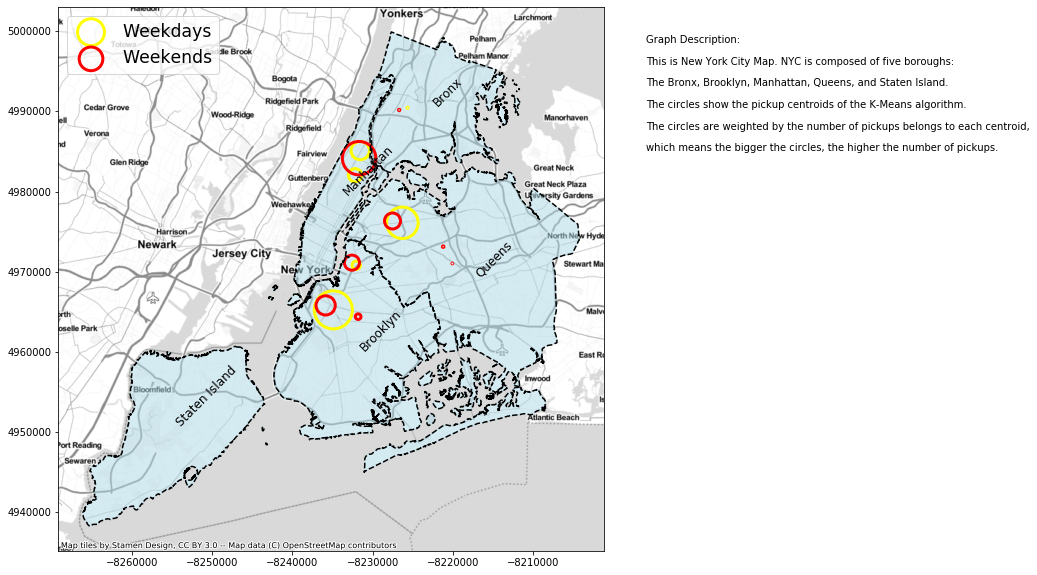

In [495]:
df_NYC = gpd.read_file(gpd.datasets.get_path('nybb'))
df_NYC = df_NYC.to_crs(epsg=3857)
ax = df_NYC.plot(figsize=(10, 10), alpha=0.5, edgecolor='lightblue', color = 'lightblue')
df_NYC.boundary.plot(ax=ax , color = 'black', linestyle = '--')
gpd.tools.geocode(df_NYC.BoroName).to_crs(epsg=3857).plot(ax = ax , marker= '')

ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
color_list = ['yellow','red']
week_list = ['Weekdays','Weekends']


for i_week in range(2):
    if i_week == 0:
        marker = 'o'
    else:
        marker = '*'
        
    condition = (df_clusters_gpd['weekend'] == i_week) 
    
    df_clusters_gpd[condition].to_crs(epsg=3857).plot(
    marker = 'o' ,ax = ax , facecolor = '' , color = color_list[i_week] , 
        linewidths=3 , label = week_list[i_week] , 
        sizes = pow(df_clusters_gpd[condition]['n_trips_centroid'],4)*pow(10,5.5) )

for x, y, BoroName in zip(df_NYC.centroid.geometry.x, df_NYC.centroid.geometry.y, df_NYC.BoroName):
    ax.annotate(BoroName, xy=(x, y), xytext=(x, y) , size = 12, rotation=45)    

plt.legend(loc = 'upper left', fontsize = 'xx-large')  
plt.figtext(.95, .83, 'Graph Description:')
plt.figtext(.95, .80, 'This is New York City Map. NYC is composed of five boroughs:')
plt.figtext(.95, .77, 'The Bronx, Brooklyn, Manhattan, Queens, and Staten Island.')
plt.figtext(.95, .74, 'The circles show the pickup centroids of the K-Means algorithm.')
plt.figtext(.95, .71, 'The circles are weighted by the number of pickups belongs to each centroid,')
plt.figtext(.95, .68, 'which means the bigger the circles, the higher the number of pickups.')

plt.show()    

The above graph shows that the most popular pickup location on weekdays is located almost north west of Brooklyn (close to Brooklyn Bridge). The most popular pickup location at the weekends is located in Manhattan (close to Central Park). So popular pickup locations are quite different on weekdays vs. weekends. The second highest popular pickup location is located in West Queens in weekdays.        

### Summary
- I built K-Means clustering to find the most popular pickup locations for weekdays and weekends.
- Popular pickup locations are different on weekdays compared to weekends. 
- During weekdays, the two top popular pickup locations are located northwest of Brooklyn and west Queens, respectively. 
- During weekdays, the two top popular pickup locations are located in Manhattan and northwest of Brooklyn, respectively. 


# Forecast the number of trips by hour for the next 12 hours after Feb 12th 10:00 am. 

In [4]:
df.set_index('lpep_pickup_datetime', inplace = True)

In the following, I build the hourly data frame for the number of trips. I work with the **log transformation** of the number of trips. I get better results with log-transformation probably because the variance is reduced and the series becomes more like a stationary series. 

In [12]:
## Build the hourly data frame
df_hourly = df['VendorID'].resample('1H').count().rename('trips_hourly').to_frame()
df_hourly['trips_hourly'] = np.log(df_hourly['trips_hourly'])
date_thresh = pd.date_range(end = pd.to_datetime('2016-02-12 22:00:00'), periods = 2 , freq = '12H') 

**Observations:**

The following graph shows the log of the number of trips in each day for Feb 2016. The shaded area is between 11am and 11pm, the period for which we want to test our model. The graph shows:

- a clear pattern every day.
- the pattern on the weekends is different from the pattern in the weekdays.
- there is no trend in the data. The data seems to be a stationary process.

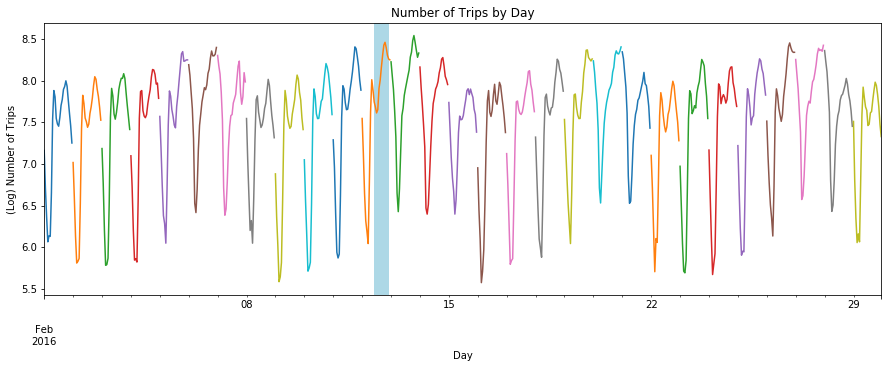

In [58]:
plt.figure(figsize = (15,5))
df_hourly.groupby(df_hourly.index.day)['trips_hourly'].plot()
plt.xlabel('Day')
plt.ylabel('(Log) Number of Trips')
plt.axvspan(date_thresh[0],date_thresh[1],facecolor = 'lightblue')
plt.title('Number of Trips by Day')
plt.show()

**Hourly pattern in the number of trips**

In the following graph, I plot the log of the number of trips as a function of hours for each day. I separate weekdays from weekends. This graph is beautiful. It shows that the number of trips repeats the same hourly pattern every day. 

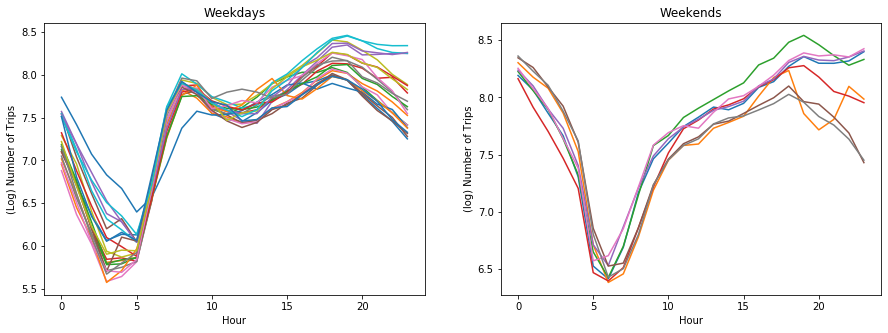

In [116]:
plt.figure(figsize = (15,5))

plt.subplot(121)
for day in np.unique(df_hourly.index.day):
    condition = (df_hourly.index.day == day) 
    if df_hourly[condition].index.weekday[0] < 5:
        plt.plot(df_hourly[condition].index.hour,df_hourly[condition]['trips_hourly'] ) 
    plt.xlabel('Hour')
    plt.ylabel('(Log) Number of Trips')
    plt.title('Weekdays')

plt.subplot(122)
for day in np.unique(df_hourly.index.day):
    condition = (df_hourly.index.day == day) 
    if df_hourly[condition].index.weekday[0] >= 5:
        plt.plot(df_hourly[condition].index.hour,df_hourly[condition]['trips_hourly'] ) 
    plt.xlabel('Hour')
    plt.ylabel('(log) Number of Trips')
    plt.title('Weekends')

**Add Features:**

Because there is an obvious hourly pattern in the data, I build the following features to add to the model:

hour: it captures the hour within a day, which ranges from 0 to 23.
day: Monday to Sunday. It takes 7 values from 0 to 6.
weekend: this is a dummy variable whether the day is a weekend or not.
week: this captures the order of the week within a month.

In [13]:
# Build Features
df_hourly['hour']  = df_hourly.index.hour
df_hourly['day']   = df_hourly.index.weekday
df_hourly['weekend']  = 1*(df_hourly.index.weekday >= 5)
df_hourly['week']  = df_hourly.index.week

## Models

**I focus on regression tree models, why?**

Instead of building a simple linear model, I start with regression tree models. The reason is that I have a strong prior that tree-based models can perform well in this context because of nonlinearity. The above graph shows that the relationship between the number of trips and hours is highly nonlinear. So, Tree-based models dominate linear models. I guess it also dominates a model with dummy variables for each features because it can take into account the interactions between features. 

**Why not ARIMA or SARIMA models?**

We can use lags of the number of trips to build ARIMA or SARIMA forecasting models. My prior is that by capturing hourly and daily patterns in the data  I can build a strong signal for the forecasting model. Note that there is no time trend in the data, so I am not worried that the most recent number of trips can help to forecast the future number of trips due to a time trend. However, it might be the case that after removing the hourly and daily pattern in the data, there is still time dependence in the data that could be helpful to build a better forecasting model. After building the regression tree-based models, I will explore whether or not there is any time dependence in the residual of the model, and whether this time dependence is a good signal to be added to the model. Note that I could start with a SARIMA model in which we take into account both seasonality and time dependence. However, here it seems there are multiple seasonal patterns (hourly and daily). SARIMA models do not perform well with multiple seasonal patterns. 


I build gradient boosting (GB) regression trees and regression random forests. I do hyperparameter tuning to find the optimal learning rate for GB regression trees.  

**Performance Measure:** I use R-sqaured as the perforemance measure. 

**Train, Valication, Test sets:**
The test set is the period between 11am and 11pm on Feb 12th. For hyper-parameter tunning, I split the data excluding the test set to training and validation sets. 

**K-fold cross validation:** For hyperparameter tuning of regression tree models, I apply 5 folds cross-validation. When I work on ARIMA models, I use time series K-folds validation. I train the model on the first T observations. Then I find the out-of-sample performance in the next 12 hours. For the next fold, I train the model on the first T+12 hours and find the out-of-sample performance in the next 12 hours. I continue this for all folds. 


**Why not time based cross validation for tree based models?**
Note that I do not apply typical cross-validation methods in time series models on the regression tree models. The reason is that I do not use any time dependency information to build the regression tree models. 

**Isn't cheating that I use data before and after Feb 12th to train a regression tree models to forecast Feb 12th?**
No, it is not. The idea is that it seems the hourly pattern of every Fridays, for example, looks quite similar. It does not matter that the Friday is before Feb 12th or after Feb 12th. I use the data after Feb 12th because I want to make sure that I have enough data to build a good prediction model for Fridays. Since I am told to download and use the data for Feb 2016, I did not want to use data before Feb 2016 to train the model. 

In [14]:
X = df_hourly.drop(['trips_hourly'],axis = 1)
y = df_hourly['trips_hourly']

condition = (X.index <= date_thresh[0]) | (X.index > date_thresh[1])

X_train = X[condition]    ## all Feb excluding 11am-11pm Feb 12th
y_train = y[condition]    ## all Feb excluding 11am-11pm Feb 12th
X_test  = X[~condition]   ## 11am-11pm Feb 12th
y_test  = y[~condition]   ## 11am-11pm Feb 12th

### Gradient Boosting Regression

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

**Hyperparameter Tunning for Learning Rate in GB Regression Trees:**

In the following, I do grid search for 100 learning rates to choose the optimal learning rate. 

In [16]:
N_fold = 5
date_range = pd.date_range(end = pd.to_datetime(date_thresh[0]), periods = N_fold + 1 , freq = '12H') 
list_R2_mean = []
list_R2_std = []
N_learning_rate = 100
learning_rate = 0.09
list_learning_rate = []
increase_learning_rate = 1.02

for i in range(N_learning_rate):
    list_R2_tmp = []
    
    for i_fold in range(N_fold):
    
        condition_train = (X.index <= date_range[i_fold])
        condition_validation = (X.index > date_range[i_fold]) & (X.index <= date_range[i_fold+1])
        X_train_fold = X[condition_train]
        y_train_fold = y[condition_train]
        X_train_validation  = X[condition_validation]
        y_train_validation  = y[condition_validation]
    
        model_gb = GradientBoostingRegressor( random_state= 0 ,   
        learning_rate = learning_rate, 
        n_estimators = 100).fit(X_train_fold,y_train_fold)
        
        list_R2_tmp.append(model_gb.score(X_train_validation,y_train_validation))
    
   # print(list_R2_tmp)
    list_learning_rate.append(learning_rate)
    learning_rate *= increase_learning_rate
    list_R2_mean.append(np.mean(list_R2_tmp))
    list_R2_std.append(np.std(list_R2_tmp))
    


df_learning_rate = pd.DataFrame(list_learning_rate , columns= ['learning_rate'])
df_learning_rate = df_learning_rate.join(pd.DataFrame(list_R2_mean , columns= ['R2_mean']))
df_learning_rate = df_learning_rate.join(pd.DataFrame(list_R2_std , columns= ['R2_std']))


In [17]:
optimal_learning_rate = df_learning_rate[df_learning_rate['R2_mean'] == df_learning_rate['R2_mean'].max()]['learning_rate'].values
print('Optimal Learning Rate for GB Model =',  optimal_learning_rate)

Optimal Learning Rate for GB Model = [0.23749306]


In [36]:
model_gb = GradientBoostingRegressor( random_state= 0 ,   
            learning_rate = optimal_learning_rate, 
            n_estimators = 100).fit(X_train,y_train)

In [37]:
print('R-Squared GB Model on Training Set =', model_gb.score(X_train,y_train))
print('R-Squared GB Model on 5-folds Cross Validation Sets =', cross_val_score(model_gb, X_train,y_train))
print('R-Squared GB Model on Test Set =', model_gb.score(X_test,y_test))

R-Squared GB Model on Training Set = 0.9829512680552928
R-Squared GB Model on 5-folds Cross Validation Sets = [0.95426911 0.96467005 0.92575892 0.94508996 0.92921924]
R-Squared GB Model on Test Set = 0.9830708221078512


### Regression Random Forests

In the following, I also build a regression random forests. We can see that the perforemance of a GB model is higher than random forest model. 

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state= 0,n_estimators = 100).fit(X_train,y_train)

In [39]:
print('R-Squared RF Model on Training Set =', model_rf.score(X_train,y_train))
print('R-Squared RF Model on 5-folds Cross Validation Sets =', cross_val_score(model_rf, X_train,y_train))
print('R-Squared RF Model on Test Set =', model_rf.score(X_test,y_test))

R-Squared RF Model on Training Set = 0.9965741048274592
R-Squared RF Model on 5-folds Cross Validation Sets = [0.97198109 0.96997889 0.933156   0.93026783 0.98349861]
R-Squared RF Model on Test Set = 0.9538934298850652


### ARIMA Model

To make sure that regression tree models dominate ARIMA, here I build the ARIMA model. I reported the augmented Dickey-Fuller test (ADF) below. It shows that the null hypothesis (non-stationarity) of log number of trips is rejected at 5% type one error. So the series is stationary, and we can build an ARIMA model. I follow the below steps:

- I use AIC as the criterion to choose the optimal ARIMA order.
- I use the time series K-fold validation to find out-of-sample R-squared to evaluate the model. Specifically, I start with the first T observations to train the ARIMA model with the optimal order found in the previous step. Then I use the model to forecast for the next 12 hours. In the next fold, I train the model on the first T+12 observations and forecast out-of-sample on the next 12 hours. I continue this for 5 folds. I find the average and standard deviation of the R-Squared out-of-sample to evaluate the model.

In [20]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(y) ## ADF test for stationarity

(-2.9697728164741135,
 0.03781529243337297,
 20,
 675,
 {'1%': -3.4400749518321394,
  '5%': -2.865831348847229,
  '10%': -2.5690552762688617},
 -532.8702039069678)

In [23]:
condition_train_ts = (y.index <= date_thresh[0]) 
condition_test_ts  = (y.index > date_thresh[0]) & (y.index <= date_thresh[1])

y_train_ts = y[condition_train_ts] 
y_test_ts  = y[condition_test_ts] 

In [24]:
model_autoarima_y = pm.arima.auto_arima(y_train_ts,start_p = 20  , start_q = 2,max_p = 48 , max_q = 10 ,  information_criterion = 'aic')
order_y = model_autoarima_y.order
print('optimal ARIMA order based on AIC =' ,  order_y)

optimal ARIMA order based on AIC=  (25, 0, 3)


In [27]:
## This is a function to find 5 folds validation 
def Kfolds_time_series_validation(y_ts,order):

    N_fold = 5
    date_range = pd.date_range(end = pd.to_datetime('2016-02-12 10:00:00'), periods = N_fold + 1 , freq = '12H') 
    list_R2_mean = []
    list_R2_std = []
    list_p =[order[0]]
    list_q = [order[2]]

    for p in list_p:
       # print('p = ', p)
        for q in list_q:
            list_R2_tmp = []
        #    print('q = ', q)
            for i_fold in range(N_fold):
        #        print('i_fold = ', i_fold)
                condition_train = (y_ts.index <= date_range[i_fold])
                condition_validation = (y_ts.index > date_range[i_fold]) & (y_ts.index <= date_range[i_fold+1])
                y_ts_train_fold = y_ts[condition_train]
                y_ts_train_validation  = y_ts[condition_validation]


                model_arima = SARIMAX( endog = y_ts_train_fold , 
                                exog = None ,order = (p,0,q) ,
                                enforce_stationarity = False , 
                                enforce_invertibility = False).fit()
            
                r2_OOS = r2_score(y_ts_train_validation,model_arima.forecast(12))
              #  print(r2_OOS)
                list_R2_tmp.append(r2_OOS)
        
            list_R2_mean.append(np.mean(list_R2_tmp))
            list_R2_std.append(np.std(list_R2_tmp))
        
        

    df_arima = pd.DataFrame(list_p , columns= ['P'])
    df_arima = df_arima.join(pd.DataFrame(list_q , columns= ['Q']))
    df_arima = df_arima.join(pd.DataFrame(list_R2_mean , columns= ['R2_mean']))
    df_arima = df_arima.join(pd.DataFrame(list_R2_std , columns= ['R2_std']))

    return df_arima


In [109]:
y_ts = y.copy()

model_arima_cv_y = Kfolds_time_series_validation(y_ts,order_y)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [110]:
model_arima_cv_y

,P,Q,R2_mean,R2_std
0,25,3,0.69672,0.398006


In [111]:
model_arima_y = SARIMAX( endog = y_train_ts , 
                                exog = None ,order = order_y ,
                                enforce_stationarity = False , 
                                enforce_invertibility = False).fit()

print('R-Squared ARIMA Model on Training Set =', r2_score(y_train_ts,model_arima_y.predict()) )
print('R-Squared ARIMA Model on 5-folds Validation Sets =', model_arima_cv_y['R2_mean'].values[0])
print('R-Squared ARIMA Model on Test Set =', r2_score(y_test_ts,model_arima_y.forecast(12)) )

R-Squared ARIMA Model on Training Set = 0.05821810254071025
R-Squared ARIMA Model on 5-folds Validation Sets = 0.6967197506553477
R-Squared ARIMA Model on Test Set = 0.8494012927212455


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### ARIMA Model on Residuals

We have seen so far that random forests and gradient boosting algorithms have acceptable performance because they could capture the hourly pattern in the data quite well. However, we may think that there is time dependence in the data that is useful to take into account. To explore this, I find the residuals (y - prediction) from the random forests model. Then, I build an ARIMA model to explore whether incorporating time dependence is a powerful signal to be incorporated in the model or not.   


In [117]:
## Find Random Forest Residuals
resid = y - model_rf.predict(X)
df_resid = resid.to_frame()

The below graph shows the Random Forests residuals. ADF test shows that the residuals are stationary. In the following, we explore whether we can capture any time dependence with a simple ARIMA model and whether this time dependence is powerful enough to be used in forecasting. Like before, first I use AIC to find the optimal ARIMA order. Then, I use the model to find 5-fold time series out-of-sample forecasting before 10am Feb 12th. 

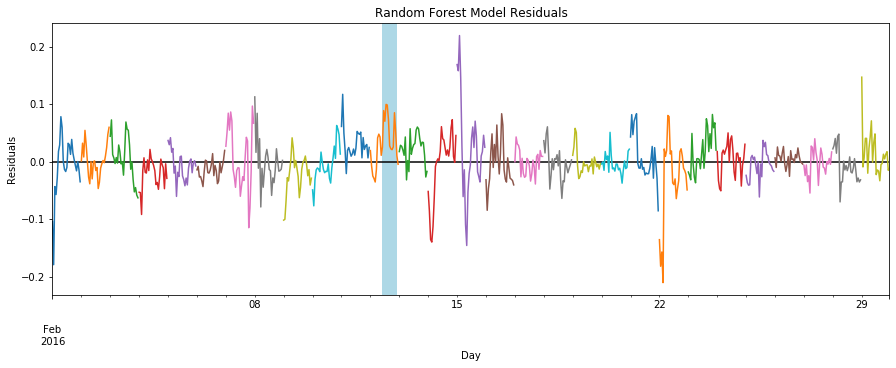

ADF Test: (-11.04033823237569, 5.3858813578027365e-20, 4, 691, {'1%': -3.4398489271901713, '5%': -2.8657317673059395, '10%': -2.569002221596252}, -2789.6265653865776)


In [63]:
plt.figure(figsize = (15,5))
df_resid.groupby(df_resid.index.day)['trips_hourly'].plot()
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.axvspan(date_thresh[0],date_thresh[1],facecolor = 'lightblue')
plt.title('Random Forest Model Residuals')
plt.hlines(0,xmin = df_resid.index.min() , xmax = df_resid.index.max()  )
plt.show()
print('ADF Test:' ,adfuller(df_resid)) ## ADF test for stationarity

In [47]:
condition_train_ts = (df_resid.index <= date_thresh[0]) 
condition_test_ts = (df_resid.index > date_thresh[0]) & (df_resid.index <= date_thresh[1])

y_resid_train_ts = df_resid[condition_train_ts] 
y_resid_test_ts  = df_resid[condition_test_ts] 

In [112]:
model_autoarima_y_resid = pm.arima.auto_arima(y_resid_train_ts,start_p = 20  , start_q = 2,max_p = 48 , max_q = 10 ,  information_criterion = 'aic')
order_y_resid = model_autoarima_y_resid.order

print('optimal ARIMA order based on AIC =' ,  order_y_resid)

optimal ARIMA order based on AIC = (3, 0, 1)


In [113]:
y_ts = df_resid.copy()

arima_model_cv_y_resid = Kfolds_time_series_validation(y_ts,order_y_resid)

In [114]:
arima_model_cv_y_resid

,P,Q,R2_mean,R2_std
0,3,1,-0.88626,1.167801


In [115]:
model_arima_y_resid = SARIMAX( endog = y_resid_train_ts , 
                                exog = None ,order = order_y_resid ,
                                enforce_stationarity = False , 
                                enforce_invertibility = False).fit()


print('R-Squared Residual-ARIMA Model on Training Set =', r2_score(y_resid_train_ts,model_arima_y_resid.predict()) )
print('R-Squared Residual-ARIMA Model on 5-folds Validation Sets =', arima_model_cv_y_resid['R2_mean'].values[0])
print('R-Squared Residual-ARIMA Model on Test Set =', r2_score(y_resid_test_ts,model_arima_y_resid.forecast(12)) )

R-Squared Residual-ARIMA Model on Training Set = 0.4021772425454774
R-Squared Residual-ARIMA Model on 5-folds Validation Sets = -0.8862597957368127
R-Squared Residual-ARIMA Model on Test Set = -2.802032509343369


The above results show that the average R2-squared on the validation set is negative, meaning that no-model can perform better than the ARIMA model in the out-of-sample forecast. Note that the R2-Squared on the training set is 40%. This means that the model suffers from a high variance problem. So, although it seems there is time dependence in the data, but a simple ARIMA model is not good enough to capture it. To train a better model (reduce variance), we could add more data. For example, we could add January data to see if we can build a better model. I chekced regularization models. Those models are not also good in building a good prediction model.

## Compare Models:

I compare the Gradient Boosting, Random Forests, and ARIMA model results in the following. 


In [77]:
df_model_compare = pd.DataFrame([])
columns= ['Model','R2 Training Set','R2 5-folds CV (mean)','R2 Test Set']

array_GB = np.array(['Gradient Boosting',model_gb.score(X_train,y_train),
           np.mean(cross_val_score(model_gb, X_train,y_train))
           ,model_gb.score(X_test,y_test)] ).reshape(1,-1)

array_RF = np.array(['Random Forests',model_rf.score(X_train,y_train),
           np.mean(cross_val_score(model_rf, X_train,y_train))
           ,model_rf.score(X_test,y_test)] ).reshape(1,-1)

array_ARIMA = np.array(['ARIMA',r2_score(y_train_ts,model_arima_y.predict()),
           model_arima_cv_y['R2_mean'].values[0]
           ,r2_score(y_test_ts,model_arima_y.forecast(12))] ).reshape(1,-1)

In [78]:
df_model_compare = df_model_compare.append(pd.DataFrame(array_RF , columns = columns))
df_model_compare = df_model_compare.append(pd.DataFrame(array_GB , columns = columns))
df_model_compare = df_model_compare.append(pd.DataFrame(array_ARIMA , columns = columns))

In [79]:
df_model_compare.reset_index(drop = True)

,Model,R2 Training Set,R2 5-folds CV (mean),R2 Test Set
0,Random Forests,0.9965741048274592,0.9577764834334394,0.9538934298850652
1,Gradient Boosting,0.9829512680552928,0.9438014553168121,0.9830708221078512
2,ARIMA,0.05821810254071025,0.6967197506553477,0.8494012927212455


Based on the above table, the Random forests model has the highest R-Squared on the validation sets. So, I choose Random forests as the best model for forecasting the number of trips. Note that Gradient Boosting has a higher R-Squared on the test set, but this is just a matter of luck. Cross-validation result shows that random forests have a higher mean and lower variance in out-of-sample prediction.  

The below graph shows that the most important signal is the hour (almost 81%). The next feature is the day of the week. So, as we discussed earlier hourly and daily patterns in the data are strong signals to predict the number of trips.  

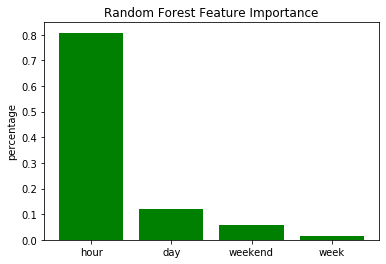

In [92]:
plt.bar(range(len(model_rf.feature_importances_)),model_rf.feature_importances_, 
        tick_label = X.columns , facecolor = 'green')
plt.title('Random Forest Feature Importance')
plt.ylabel('percentage')
plt.show()

## How well did we do?

Note that I built and compare models based on log transformation of number trips. Here, I report the performance of the random forest model on the test set for the level of the number of trips. The results show that the R-Squared on the test set is 0.982. 

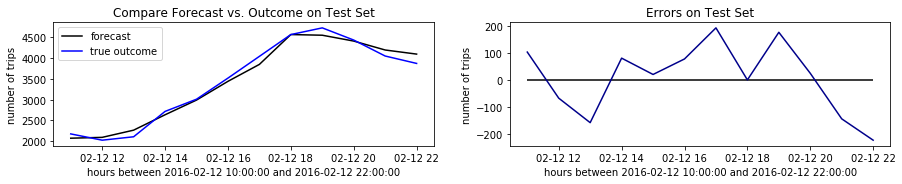

R-Squared Random Forests on Test Set 0.9822141403060889


In [108]:
plt.figure(figsize = (15,5))

condition = (X.index <= date_thresh[0])
condition = (X.index <= date_thresh[0]) | (X.index > date_thresh[1])
plt.subplot(221)
plt.plot( df_resid[~condition].index, np.exp(model_gb.predict(X_test)) , color = 'black' , label = 'forecast')
plt.plot( df_resid[~condition].index, np.exp(y_test) , color = 'blue', label = 'true outcome')
plt.xlabel(f'hours between {date_thresh[0]} and {date_thresh[1]}')
plt.ylabel('number of trips')
plt.title('Compare Forecast vs. Outcome on Test Set')
plt.legend()

plt.subplot(222)
plt.plot( df_resid[~condition].index, np.exp(y_test)- np.exp(model_gb.predict(X_test)) , color = 'darkblue')
plt.xlabel(f'hours between {date_thresh[0]} and {date_thresh[1]}')
plt.hlines(0,xmin = df_resid[~condition].index.min() , xmax = df_resid[~condition].index.max()  )
plt.ylabel('number of trips')
plt.title('Errors on Test Set')

plt.show()

print('R-Squared Random Forests on Test Set', r2_score( np.exp(y_test),np.exp(model_gb.predict(X_test)) ))



## Summary

- There are strong hourly and daily patterns in the number of trips. 
- I use hours and days to build a prediction model for the number of trips. 
- I apply regression random forests. The R-squared on the test set is 0.982. 
- The Random Forests work well because this model can capture the highly nonlinear hourly and daily pattern in the number of trips. 
- Although I find that after removing daily and hourly pattern there is time dependence in the number of trips, I find that a simple linear model (ARIMA) perform worse than no-model to forecast. So, I do not use time dependence in forecasting. 



